In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
games = pd.read_csv("steam.csv")

games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [43]:
games.english.value_counts()

english
1    26564
0      511
Name: count, dtype: int64

In [44]:
# Filtering 1: only enlgish games
games = games.loc[games['english'] == 1]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26564 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             26564 non-null  int64  
 1   name              26564 non-null  object 
 2   release_date      26564 non-null  object 
 3   english           26564 non-null  int64  
 4   developer         26563 non-null  object 
 5   publisher         26550 non-null  object 
 6   platforms         26564 non-null  object 
 7   required_age      26564 non-null  int64  
 8   categories        26564 non-null  object 
 9   genres            26564 non-null  object 
 10  steamspy_tags     26564 non-null  object 
 11  achievements      26564 non-null  int64  
 12  positive_ratings  26564 non-null  int64  
 13  negative_ratings  26564 non-null  int64  
 14  average_playtime  26564 non-null  int64  
 15  median_playtime   26564 non-null  int64  
 16  owners            26564 non-null  object 
 17

In [45]:
games['platforms'].value_counts()
# Filtering 2: platforms containing windows

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [46]:
games['genres'].value_counts()
# Feature engineering 1: separate out columns

genres
Action;Indie                                                                 1840
Casual;Indie                                                                 1467
Action;Adventure;Indie                                                       1223
Adventure;Indie                                                              1148
Action;Casual;Indie                                                          1000
                                                                             ... 
Casual;Free to Play;Massively Multiplayer;Early Access                          1
Nudity;Adventure;Casual                                                         1
Casual;Free to Play;Indie;Racing;Early Access                                   1
Casual;Indie;Massively Multiplayer;Simulation;Early Access                      1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: count, Length: 1528, dtype: int64

In [47]:
games['positive_ratings'].describe()

count    2.656400e+04
mean     1.016363e+03
std      1.916965e+04
min      0.000000e+00
25%      6.000000e+00
50%      2.500000e+01
75%      1.270000e+02
max      2.644404e+06
Name: positive_ratings, dtype: float64

In [48]:
games['owners'].value_counts()

owners
0-20000                18166
20000-50000             3016
50000-100000            1676
100000-200000           1373
200000-500000           1268
500000-1000000           513
1000000-2000000          287
2000000-5000000          192
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: count, dtype: int64

# Feature Engineering

In [49]:
# Create positive_ratio column (proportion of number of positive ratings to total number of ratings)
def get_rating_ratio(df):
    df['rating_num'] = df['positive_ratings'] + df['negative_ratings']
    df['positive_ratio'] = df['positive_ratings'] / df['rating_num']

In [50]:
def get_low_high_sales(df):
    df[['owners_low', 'owners_high']] = df['owners'].str.split("-", expand=True).astype(int)
    df['sales_low'] = df['owners_low'] * df['price']
    df['sales_high'] = df['owners_high'] * df['price']


In [51]:
get_rating_ratio(games)
get_low_high_sales(games)
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,average_playtime,median_playtime,owners,price,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,17612,317,10000000-20000000,7.19,127873,0.973888,10000000,20000000,71900000.0,143800000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,277,62,5000000-10000000,3.99,3951,0.839787,5000000,10000000,19950000.0,39900000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,187,34,5000000-10000000,3.99,3814,0.895648,5000000,10000000,19950000.0,39900000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,258,184,5000000-10000000,3.99,1540,0.826623,5000000,10000000,19950000.0,39900000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,624,415,5000000-10000000,3.99,5538,0.947996,5000000,10000000,19950000.0,39900000.0


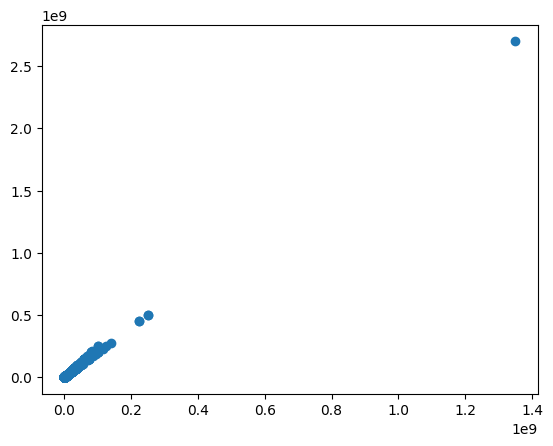

In [84]:
plt.scatter(games['sales_low'], games['sales_high'])

<Axes: >

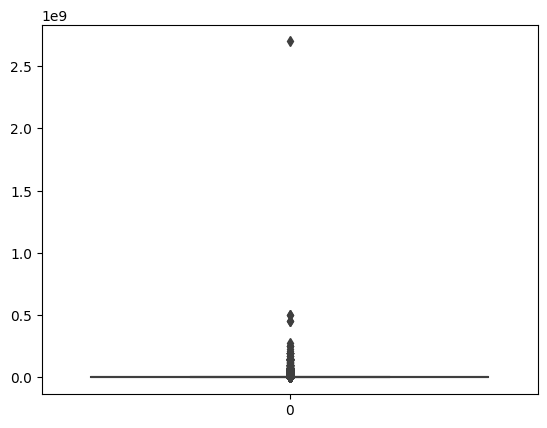

In [87]:
import seaborn as sns
sns.boxplot(games['sales_high'])

In [60]:
games[['owners_low', 'owners_high', 'sales_low', 'sales_high', 'price']].describe()

,owners_low,owners_high,sales_low,sales_high,price
count,2.656400e+04,2.656400e+04,2.656400e+04,2.656400e+04,26564.000000
mean,8.140792e+04,1.907589e+05,7.062524e+05,1.607584e+06,6.086621
std,8.790725e+05,1.803487e+06,9.763481e+06,1.991366e+07,7.877340
min,0.000000e+00,2.000000e+04,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,2.000000e+04,0.000000e+00,3.980000e+04,1.690000
50%,0.000000e+00,2.000000e+04,0.000000e+00,1.038000e+05,3.990000
75%,2.000000e+04,5.000000e+04,3.180000e+04,2.698000e+05,7.190000
max,1.000000e+08,2.000000e+08,1.349500e+09,2.699000e+09,421.990000


In [76]:
games['price'].value_counts()

price
3.99     3185
0.79     2811
0.00     2467
6.99     2045
7.19     1289
         ... 
11.95       1
3.92        1
6.59        1
4.12        1
6.10        1
Name: count, Length: 278, dtype: int64

In [77]:
games = games.loc[games['price'] != 0]

<class 'pandas.core.frame.DataFrame'>
Index: 24097 entries, 0 to 27074
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             24097 non-null  int64  
 1   name              24097 non-null  object 
 2   release_date      24097 non-null  object 
 3   english           24097 non-null  int64  
 4   developer         24096 non-null  object 
 5   publisher         24087 non-null  object 
 6   platforms         24097 non-null  object 
 7   required_age      24097 non-null  int64  
 8   categories        24097 non-null  object 
 9   genres            24097 non-null  object 
 10  steamspy_tags     24097 non-null  object 
 11  achievements      24097 non-null  int64  
 12  positive_ratings  24097 non-null  int64  
 13  negative_ratings  24097 non-null  int64  
 14  average_playtime  24097 non-null  int64  
 15  median_playtime   24097 non-null  int64  
 16  owners            24097 non-null  object 
 17

In [79]:
kmeans_data = games[['sales_low', 'sales_high', 'price']]
kmeans_data.head()

,sales_low,sales_high,price
0,71900000.0,143800000.0,7.19
1,19950000.0,39900000.0,3.99
2,19950000.0,39900000.0,3.99
3,19950000.0,39900000.0,3.99
4,19950000.0,39900000.0,3.99


In [80]:
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(n_clusters=3, random_state=42).fit(kmeans_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
model.cluster_centers_
model.inertia_
metrics.silhouette_score(kmeans_data, model.predict(kmeans_data))

0.9816637542322033

In [82]:
labeled_kmeans_data = pd.concat([kmeans_data, pd.DataFrame(model.labels_, columns=['cluster'])], axis=1)
labeled_kmeans_data.head()

,sales_low,sales_high,price,cluster
0,71900000.0,143800000.0,7.19,2.0
1,19950000.0,39900000.0,3.99,0.0
2,19950000.0,39900000.0,3.99,0.0
3,19950000.0,39900000.0,3.99,0.0
4,19950000.0,39900000.0,3.99,0.0


In [83]:
labeled_kmeans_data['cluster'].value_counts()

cluster
0.0    23972
2.0      124
1.0        1
Name: count, dtype: int64

In [ ]:
# Feature Engineering 3-2: Bin Sales